## 1. Multi-Class Classification:
For the multiclass classification problem, there were six different datasets. Some of the datasets contain missing values. For example, TrainData1, TestData1 and TrainData3 contain some missing values (1.00000000000000e+99). Therefore, the first approach needs to handle the missing values for selecting the features. Then compare the accuracy on train dataset to find out which classifier gives best result for each dataset with cross validation to verify the accuracy based on test dataset.
<center><div style='width:50%; height:50%'><img src='images/Q1_table.jpg'></div></center>

Hint:
* Missing Value Estimation
    - (KNN method for imputation of the missing values)
* Dimensionality Reduction
* Use Several Classifiers/ Ensemble Method
    - Logistic Regression (with different c values)
    - Random Forest (with different estimator values)
    - SVM (with different kernels)
    - KNN (with k = 1,2,5,10,20)
    - K (3,5,10) Fold Cross Validation
* Performance Comparison
    - Classification Accuracy, Precision, Recall, Sensitivity, Specificity
    - AUC, ROC Curve

In [1278]:
import warnings
warnings.filterwarnings('ignore')

# Python magic
# %matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn: KNN, SVM, LR, RF
from sklearn.neighbors import KNeighborsClassifier
from impyute.imputation.cs import fast_knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV

In [1279]:
X_train2 = pd.read_csv('data/1/TrainData2.txt', delimiter='\s+', header=None)
y_train2 = pd.read_csv('data/1/TrainLabel2.txt', delimiter='\n', header=None)
X_test2 = pd.read_csv('data/1/TestData2.txt', delimiter='\s+', header=None)

In [1280]:
X_train3 = pd.read_csv('data/1/TrainData3.txt', delimiter='\s+', header=None)
y_train3 = pd.read_csv('data/1/TrainLabel3.txt', delimiter='\n', header=None)
X_test3 = pd.read_csv('data/1/TestData3.txt', delimiter=',',   header=None)

In [1281]:
X_train4 = pd.read_csv('data/1/TrainData4.txt', delimiter='\s+', header=None)
y_train4 = pd.read_csv('data/1/TrainLabel4.txt', delimiter='\n', header=None)
X_test4 = pd.read_csv('data/1/TestData4.txt', delimiter='\s+', header=None)

In [1282]:
X_train5 = pd.read_csv('data/1/TrainData5.txt', delimiter='\s+', header=None)
y_train5 = pd.read_csv('data/1/TrainLabel5.txt', delimiter='\n', header=None)
X_test5 = pd.read_csv('data/1/TestData5.txt', delimiter='\s+', header=None)

In [1283]:
X_train6 = pd.read_csv('data/1/TrainData6.txt', delimiter='\s+', header=None)
y_train6 = pd.read_csv('data/1/TrainLabel6.txt', delimiter='\n', header=None)
X_test6 = pd.read_csv('data/1/TestData6.txt', delimiter='\s+', header=None)

In [1284]:
X_training = [X_train2, X_train3, X_train4, X_train5, X_train6]
y_training = [y_train2, y_train3, y_train4, y_train5, y_train6]
X_testing = [X_test2, X_test3, X_test4, X_test5, X_test6]

In [1285]:
for i,x in enumerate(X_training):
    print(f'X_TrainData{i+2} Shape: {x.shape}')

X_TrainData2 Shape: (100, 9182)
X_TrainData3 Shape: (6300, 13)
X_TrainData4 Shape: (2547, 112)
X_TrainData5 Shape: (1119, 11)
X_TrainData6 Shape: (612, 142)


In [1286]:
for i,y in enumerate(y_training):
    print(f'y_TrainData{i+2} Shape: {y.shape}')

y_TrainData2 Shape: (100, 1)
y_TrainData3 Shape: (6300, 1)
y_TrainData4 Shape: (2547, 1)
y_TrainData5 Shape: (1119, 1)
y_TrainData6 Shape: (612, 1)


In [1287]:
for j,y in enumerate(X_testing):
    print(f'TestData{j+2} Shape: {y.shape}')

TestData2 Shape: (74, 9182)
TestData3 Shape: (2693, 13)
TestData4 Shape: (1092, 112)
TestData5 Shape: (480, 11)
TestData6 Shape: (262, 142)


# _Dataset 2_

### PCA for DS2

In [1288]:
X_train2.shape

(100, 9182)

In [1304]:
X_train2.head()

,0,1,2,3,4,5,6,7,8,9,...,9172,9173,9174,9175,9176,9177,9178,9179,9180,9181
0,2.357935,1.505150,1.477121,1.301030,2.992995,1.30103,2.729974,3.275542,3.531734,2.117271,...,1.531479,1.792392,2.000000,1.477121,1.919078,1.755875,2.025306,2.107210,1.869232,1.30103
1,1.995635,1.633468,1.740363,1.819544,3.703377,1.30103,3.000434,3.118926,3.363424,1.568202,...,1.755875,2.064458,1.431364,1.633468,1.954242,1.913814,2.685742,2.952308,1.959041,1.30103
2,1.929419,1.301030,1.447158,1.301030,3.377852,1.30103,3.053463,3.390405,3.359836,1.707570,...,1.982271,2.198657,1.301030,1.707570,2.041393,1.934499,1.792392,1.880814,1.963788,1.30103
3,2.227887,1.602060,1.556302,1.908485,3.424392,1.30103,3.084219,3.288696,3.364176,1.301030,...,1.792392,2.204120,1.633468,1.716003,1.913814,2.130334,1.778151,1.838849,1.949390,1.30103
4,1.763428,1.623249,1.301030,2.029384,3.551694,1.30103,3.165541,3.141450,3.495128,1.886491,...,1.301030,1.785330,2.201397,1.623249,1.863323,1.913814,1.778151,1.698970,1.869232,1.30103


In [1289]:
y_train2.shape

(100, 1)

In [1290]:
y_train2.head()

,0
0,1
1,1
2,1
3,1
4,1


In [1291]:
y_train2.tail()

,0
95,11
96,11
97,11
98,11
99,11


In [1292]:
X_test2.shape

(74, 9182)

In [1312]:
# n_components must be between 0 and min(n_samples, n_features)=112 with svd_solver='full'

def trainPCA(X_train, X_test):
    if X_train.shape[0] < X_train.shape[1]:
        if X_train.shape[0] < X_test.shape[0]:
            n_components=X_train.shape[0]
        else:
            n_components=X_test.shape[0]
    else:
        if X_train.shape[1] < X_test.shape[1]:
            n_components=X_train.shape[1]
        else:
            n_components=X_test.shape[1]
    
    X_PCA = PCA(n_components=n_components)
    
    X_train_PCA = X_PCA.fit_transform(X_train)
    X_train_variance = X_PCA.fit(X_train)
    print(f'X_train Variance: {sum(X_train_variance.explained_variance_ratio_)}')
    print(f'X_train Shape: {X_train.shape}')
    X_train_df = pd.DataFrame(X_train_PCA)
    
    X_test_PCA = X_PCA.fit_transform(X_test)
    X_test_variance = X_PCA.fit(X_test)
    print(f'X_train Variance: {sum(X_test_variance.explained_variance_ratio_)}')
    print(f'X_train Shape: {X_test_PCA.shape}')
    X_test_df = pd.DataFrame(X_test_PCA)
    
    return X_train_df, X_test_df

In [1313]:
X_train2_cmp, X_test2_cmp = trainPCA(X_train2, X_test2)

X_train Variance: 0.9288130427292882
X_train Shape: (100, 9182)
X_train Variance: 1.0
X_train Shape: (74, 74)


In [1298]:
X_train2_cmp.shape

(100, 74)

In [1299]:
y_train2.shape

(100, 1)

In [1300]:
X_test2_cmp.shape

(74, 74)

In [1215]:
def optimizeK(X_train, y_train, X_test, y_test):
    neighbors = np.arange(1,20)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i,k in enumerate(neighbors):

        knn = KNeighborsClassifier(n_neighbors=k)

        knn.fit(X_train, y_train)

        train_accuracy[i] = knn.score(X_train, y_train)

        test_accuracy[i] = knn.score(X_test, y_test)
        
    return neighbors, test_accuracy, train_accuracy

In [1216]:
def plotK(neighbors, test_accuracy, train_accuracy):
        plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
        plt.plot(neighbors, train_accuracy, label='Training Accuracy')
        plt.legend()
        plt.xlabel('Number of Neighbors')
        plt.xticks(np.arange(0, neighbors[-1], step=1))
        plt.ylabel('Accuracy')
        plt.title('KNN Varying Number of Neighbors')
        plt.show()

In [1217]:
def getAccuracyMetrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cra = classification_report(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    return cm, cra, acc

### KNN for DS2

In [1218]:
def testK(X_train, y_train):
    # KNN to obtain optimal k for y_test1 values
    neighbors = np.arange(1,20)
    train_accuracy = np.empty(len(neighbors))

    for i,k in enumerate(neighbors):

        knn_ytest = KNeighborsClassifier(n_neighbors=k)

        knn_ytest.fit(X_train, y_train)

        train_accuracy[i] = knn_ytest.score(X_train, y_train)
    
    return neighbors, train_accuracy

In [1219]:
def plotTestK(neighbors, train_accuracy):
    plt.plot(neighbors, train_accuracy, label='Training Accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.xticks(np.arange(0, neighbors[-1], step=1))
    plt.ylabel('Accuracy')
    plt.title('KNN Varying Number of Neighbors')
    plt.show()

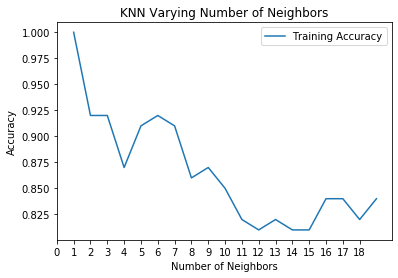

In [1220]:
neighbors, train_accuracy = testK(X_train2_cmp, y_train2)
plotTestK(neighbors, train_accuracy)

In [1221]:
def getTestLabelsKNN(n, X_train, y_train, X_test):
    knn_ytest = KNeighborsClassifier(n_neighbors=n)
    knn_ytest.fit(X_train, y_train)
    y_test = knn_ytest.predict(X_test)
    return y_test

In [1222]:
y_test2 = getTestLabelsKNN(7, X_train2_cmp, y_train2, X_test2_cmp)

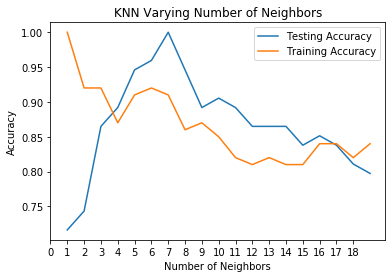

In [1223]:
n, test_acc2, train_acc2 = optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2)
plotK(n, test_acc2, train_acc2)

In [1224]:
def runKNN(n, X_train, y_train, X_test, y_test):
    n_neighbors=n
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    y_pred = knn.predict(X_test)
    return score, y_pred

In [1225]:
knn_score2, knn_y_pred2 = runKNN(3, X_train2_cmp, y_train2, X_test2_cmp, y_test2)
print(f'Accuracy: {knn_score2}')

Accuracy: 0.8648648648648649


In [1226]:
def getScoresKNN(n, y_test, y_pred):
    knn_cm, knn_cr, knn_acc = getAccuracyMetrics(y_test, y_pred)
    print(f'KNN Accuracy Score, k={n}: {knn_acc}\n')
    print(f'KNN Confusion Matrix, k={n}\n\n{knn_cm}')
    print(f'\n\t\t  KNN Classification Report, k={n_neighbors}\n\n{knn_cr}')

In [1227]:
getScoresKNN(n_neighbors, y_test2, knn_y_pred2)
pd.crosstab(y_test2, knn_y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Accuracy Score, k=1: 0.8648648648648649

KNN Confusion Matrix, k=1

[[12  0  0  1  0  0  1  0  1]
 [ 0  1  0  0  0  1  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 1  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  2  0  0  1 20  0  1  0]
 [ 0  0  0  0  0  0  6  0  0]
 [ 0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]]

		  KNN Classification Report, k=1

              precision    recall  f1-score   support

           1       0.92      0.80      0.86        15
           2       0.25      0.50      0.33         2
           3       1.00      1.00      1.00         4
           4       0.95      0.95      0.95        19
           5       0.50      1.00      0.67         1
           6       0.95      0.83      0.89        24
           8       0.86      1.00      0.92         6
           9       0.50      0.50      0.50         2
          11       0.50      1.00      0.67         1

    accuracy                           0.86        74
   macro avg       0.71 

Predicted,1,2,3,4,5,6,8,9,11,All
True,,,,,,,,,,
1,12,0,0,1,0,0,1,0,1,15
2,0,1,0,0,0,1,0,0,0,2
3,0,0,4,0,0,0,0,0,0,4
4,1,0,0,18,0,0,0,0,0,19
5,0,0,0,0,1,0,0,0,0,1
6,0,2,0,0,1,20,0,1,0,24
8,0,0,0,0,0,0,6,0,0,6
9,0,1,0,0,0,0,0,1,0,2
11,0,0,0,0,0,0,0,0,1,1


In [1228]:
def calculateMulticlassROCAUC(X_train, y_train, X_test, y_test, **kwargs):
    for k,v in kwargs.items():
        model = kwargs['model']
        tuner = kwargs['tuner']
        tuner_val = kwargs['tuner_val']
        dec = kwargs['dec']
        label_len = kwargs['label_len']
        
    labels = np.arange(1, label_len+1)
    y_bin = label_binarize(y_test, classes=labels)

    clf = OneVsRestClassifier(LinearSVC(multi_class='ovr', random_state=0))
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    y_pred = clf.predict(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(label_len):
        fpr[i+1], tpr[i+1], thresholds = roc_curve(y_bin[:, i], y_pred)
        roc_auc[i+1] = auc(fpr[i+1], tpr[i+1])
    
    for i in range(label_len):
        if math.isnan(roc_auc[i+1]):
            score = 0
        else: 
            score = round(roc_auc[i+1],2)
        if (tuner == '') or (tuner_val == None):
            plt.plot(fpr[i+1], tpr[i+1], label=f'{model}')
        else:
            plt.plot(fpr[i+1], tpr[i+1], label=f'{model}, {tuner}={tuner_val}')
        plt.plot([0, 1], [0, 1], label='tpr-fpr line')
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        if dec == True:
            plt.title(f'{model} ROC Curve Label {i+1}, ROC_Score={score}')
            tuner_val -= 1
        else:
            plt.title(f'{model} ROC Curve Label {i+1}, ROC_Score={score}')
        plt.legend()
        plt.show()

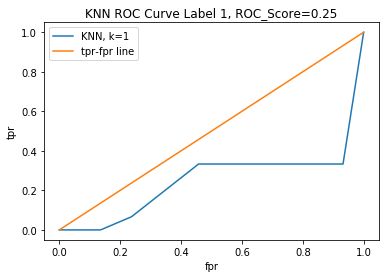

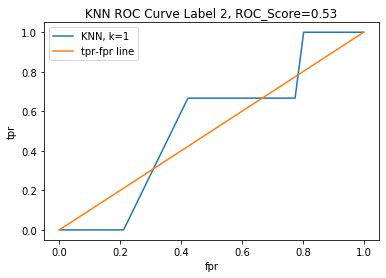

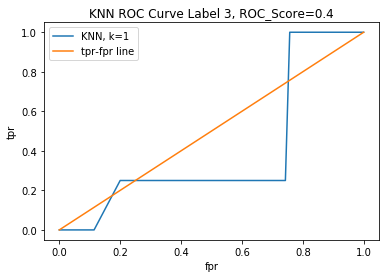

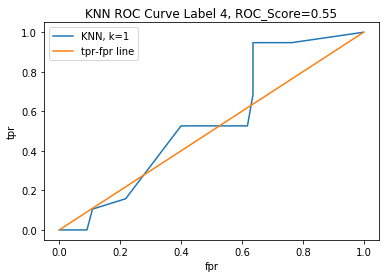

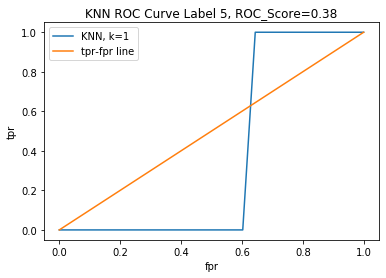

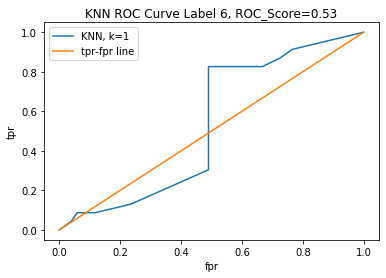

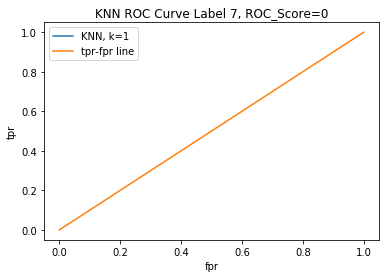

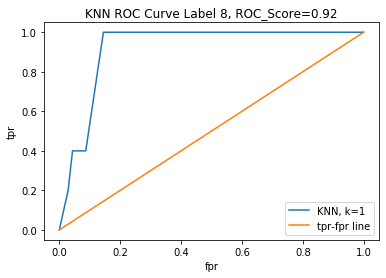

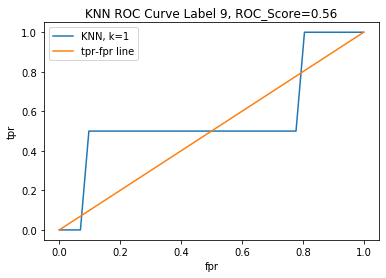

In [1229]:
calculateMulticlassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, knn_ds2_y_pred, model='KNN', tuner='k',\
                          tuner_val=n_neighbors, label_len=9, dec=False)

__________________________________________________________________________________________________________________________________________________

In [1230]:
def trainFitAccuracyLR(e, X_train, y_train, X_test, y_test):    
    c = np.arange(1, e+1)
    cma = {}
    cra = {}
    acc = {}
    preds = {}
    for i in c:    
        lr = LogisticRegression(C=i, multi_class='ovr', solver='lbfgs',random_state=0)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        cma[i] = confusion_matrix(y_test, y_pred)
        cra[i] = classification_report(y_test, y_pred)
        acc[i] = (accuracy_score(y_test, y_pred))
        preds[i] = y_pred
    return cma, cra, acc, preds

### Logistic Regression for DS2

In [1231]:
c = 10
lr_ds2_confusion_matricies, lr_ds2_classification_reports, lr_ds2_accuracies, lr_ds2_y_pred =\
    trainFitAccuracyLR(c, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

In [1232]:
import operator
ky = max(lr_ds2_accuracies.items(), key=operator.itemgetter(1))[0]
val = float(max(lr_ds2_accuracies.items(), key=operator.itemgetter(1))[1])

In [1233]:
print(f'Logistic Regression Highest Accuracy Score, C={c}: {val}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_ds2_confusion_matricies[ky]}\n')
pd.crosstab(y_test2, lr_ds2_y_pred[ky], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, C=10: 0.581081081081081

Logistic Regression Most Accurate Confusion Matrix

[[ 8  0  0  0  2  0  0  1  0  3  1]
 [ 0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  1  0  0]
 [ 0  0  2 12  2  0  2  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  3  2  0  3 12  0  1  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  1  1]
 [ 0  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]



Predicted,1,2,3,4,5,6,7,8,9,10,11,All
True,,,,,,,,,,,,
1,8,0,0,0,2,0,0,1,0,3,1,15
2,0,2,0,0,0,0,0,0,0,0,0,2
3,0,0,2,0,0,0,0,1,1,0,0,4
4,0,0,2,12,2,0,2,0,0,1,0,19
5,0,0,0,0,1,0,0,0,0,0,0,1
6,0,3,2,0,3,12,0,1,0,1,2,24
8,0,0,0,0,0,0,0,4,0,1,1,6
9,0,1,0,0,0,0,0,0,1,0,0,2
11,0,0,0,0,0,0,0,0,0,0,1,1


In [1234]:
print(f'\n\t   Logistic Regression Classification Report C={c}\n\n{lr_classification_reports[ky]}')


	   Logistic Regression Classification Report C=10

              precision    recall  f1-score   support

           1       1.00      0.41      0.58        17
           2       0.20      1.00      0.33         1
           3       0.40      0.50      0.44         4
           4       1.00      0.58      0.73        19
           5       0.11      1.00      0.20         1
           6       1.00      0.61      0.76        23
           7       0.00      0.00      0.00         0
           8       0.40      0.40      0.40         5
           9       0.33      0.33      0.33         3
          10       0.00      0.00      0.00         0
          11       0.17      1.00      0.29         1

    accuracy                           0.54        74
   macro avg       0.42      0.53      0.37        74
weighted avg       0.87      0.54      0.63        74



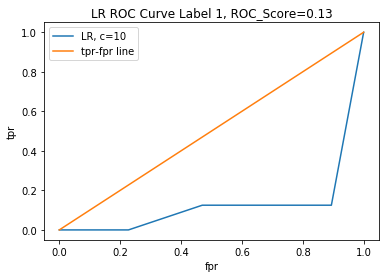

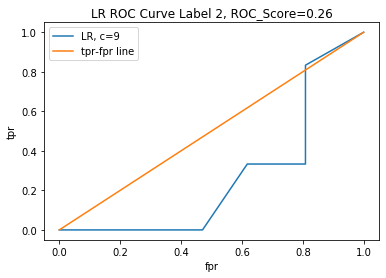

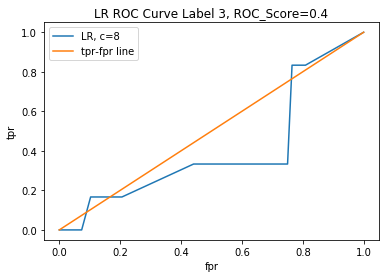

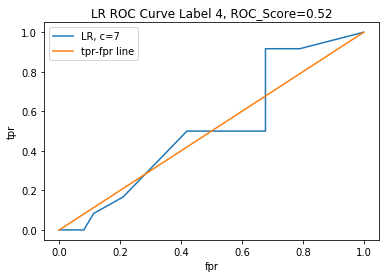

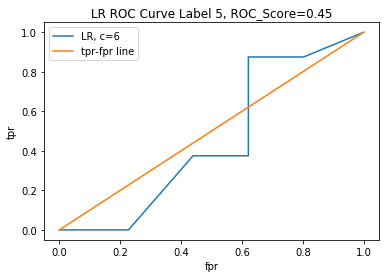

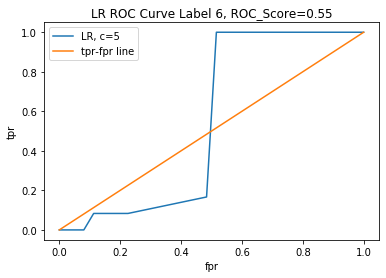

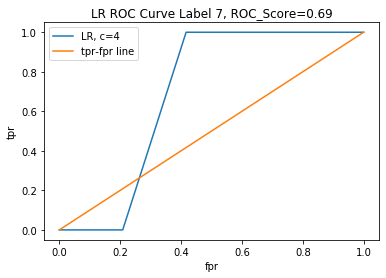

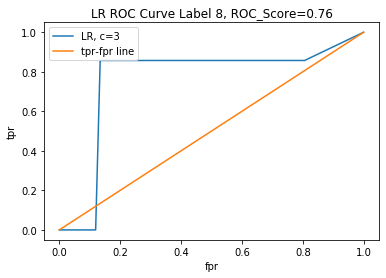

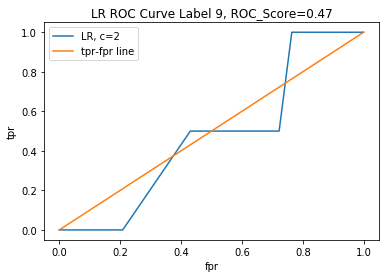

In [1235]:
calculateMulticlassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, lr_ds2_y_pred[ky], model='LR', tuner='c', tuner_val=c, label_len=9, dec=True)

## Random Forest for DS2

In [1236]:
def runRandomForest(X_train, y_train, X_test, y_test, ll):
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    rfc_cm, rfc_cr, rfc_acc = getAccuracyMetrics(y_test, rfc_pred)
    print(f'Random Forest Accuracy Score: {rfc_acc}\n')
    print(f'Random Forest Confusion Matrix\n\n{rfc_cm}\n')
    pd.crosstab(y_test, rfc_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(f'\n\t\tRandom Forest Classification Report\n\n{rfc_cr}')
    calculateMulticlassROCAUC(X_train, y_train, X_test, rfc_pred, model='RF', tuner='', tuner_val=None, label_len=ll, dec=False)

Random Forest Accuracy Score: 0.28378378378378377

Random Forest Confusion Matrix

[[3 0 4 1 2 0 2 1 0 1 1]
 [0 0 0 0 1 0 0 0 0 0 1]
 [0 0 2 1 0 0 0 1 0 0 0]
 [0 1 0 7 3 1 1 1 2 1 2]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 1 4 5 4 5 2 0 0 2 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 3 0 2 0]
 [0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.75      0.20      0.32        15
           2       0.00      0.00      0.00         2
           3       0.20      0.50      0.29         4
           4       0.50      0.37      0.42        19
           5       0.08      1.00      0.15         1
           6       0.83      0.21      0.33        24
           7       0.00      0.00      0.00         0
           8       0.43      0.50      0.46         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         0
     

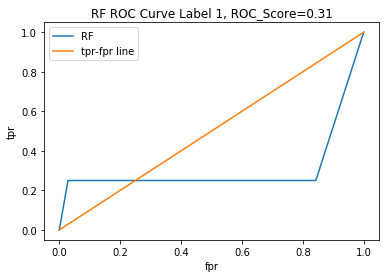

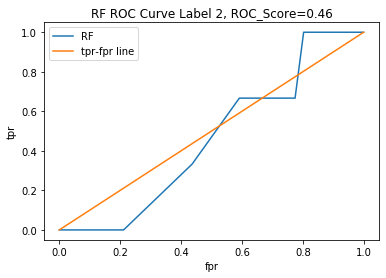

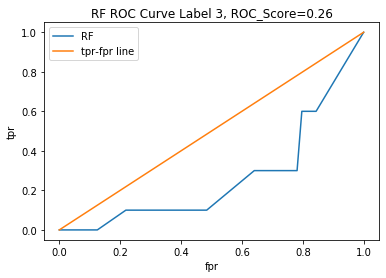

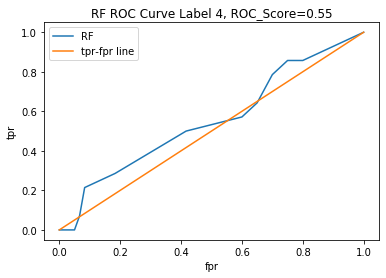

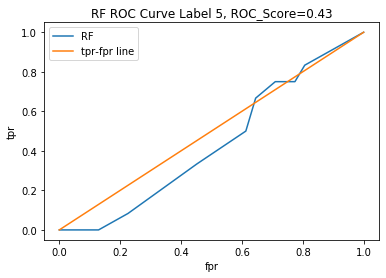

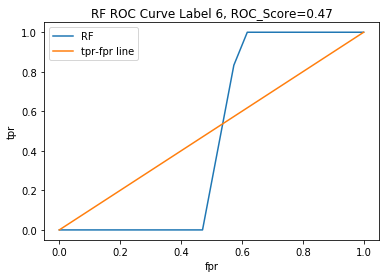

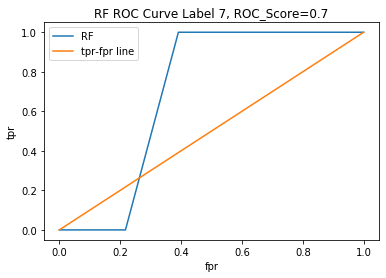

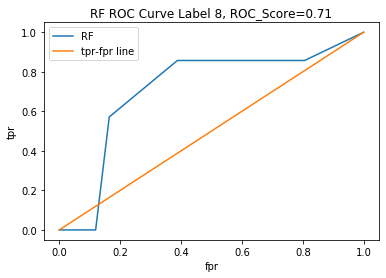

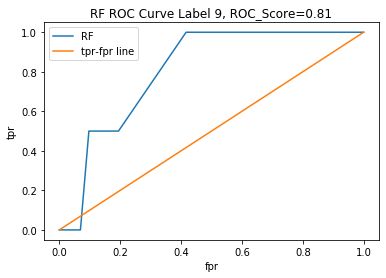

In [1237]:
runRandomForest(X_train2_cmp, y_train2, X_test2_cmp, y_test2, 9)

## SVM for DS2

In [1238]:
def runSVM(kernel, ll, X_train, y_train, X_test, y_test):
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    svm_y_pred = svm.predict(X_test)
    svm_cm, svm_cr, svm_acc = getAccuracyMetrics(y_test, svm_y_pred)
    print(f'SVM {kernel} Kernel Accuracy Score: {svm_acc}\n')
    print(f'SVM {kernel} Kernel Confusion Matrix\n\n{svm_cm}\n')
    pd.crosstab(y_test, svm_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(f'\n\t\t    SVM {kernel} Kernel Classification Report\n\n{svm_cr}')
    calculateMulticlassROCAUC(X_train, y_train, X_test, svm_y_pred, model='SVM', tuner='kernel', tuner_val=kernel, label_len=ll, dec=False)

SVM linear Kernel results
_________________________________________
SVM linear Kernel Accuracy Score: 0.527027027027027

SVM linear Kernel Confusion Matrix

[[ 4  0  2  0  3  0  0  1  0  4  1]
 [ 0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  3 12  2  0  1  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  5  1  1  2 12  0  0  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  4  0  1  0]
 [ 0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       1.00      0.27      0.42        15
           2       0.20      1.00      0.33         2
           3       0.33      0.75      0.46         4
           4       0.92      0.63      0.75        19
           5       0.12      1.00      0.22         1
           6       1.00      0.50      0.67        24
           7      

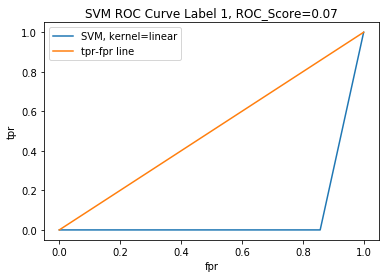

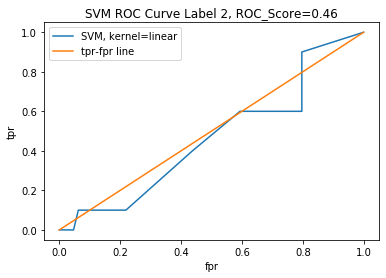

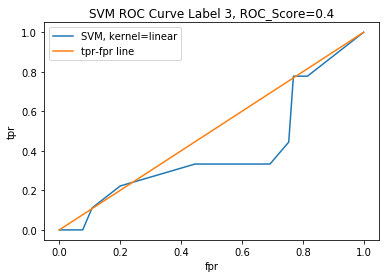

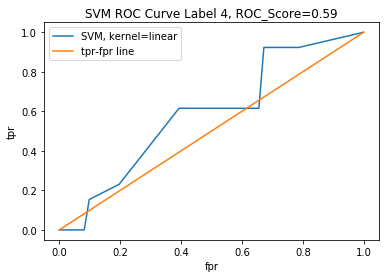

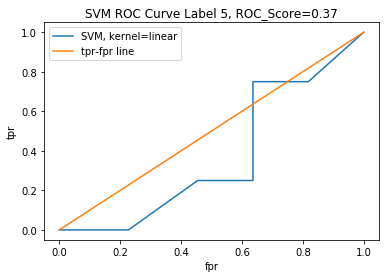

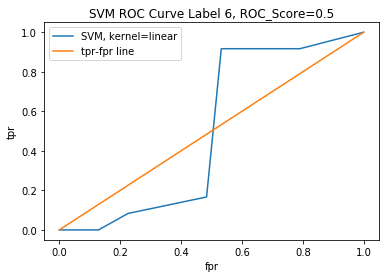

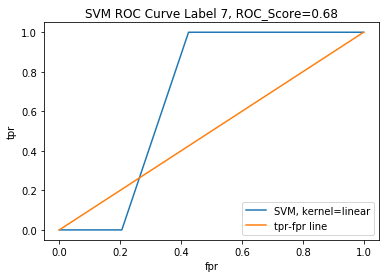

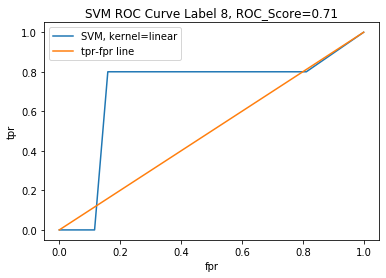

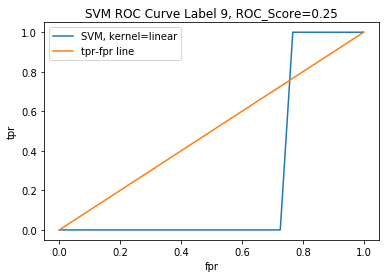

SVM poly Kernel results
_________________________________________
SVM poly Kernel Accuracy Score: 0.12162162162162163

SVM poly Kernel Confusion Matrix

[[ 0  0 15  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 0  0 16  3  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         2
           3       0.06      1.00      0.11         4
           4       1.00      0.16      0.27        19
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00        24
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2
          11       1.00      1.00      1.0

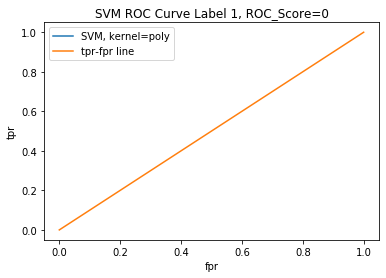

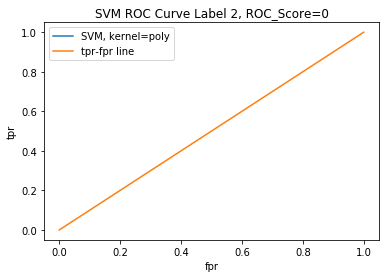

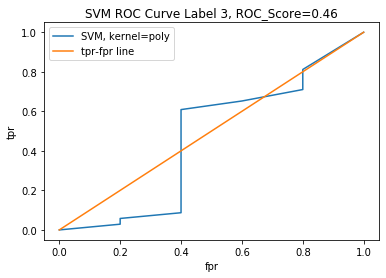

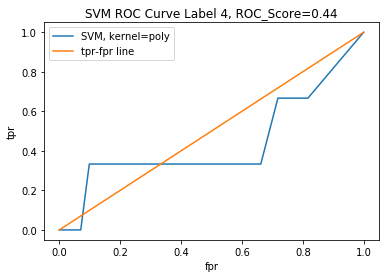

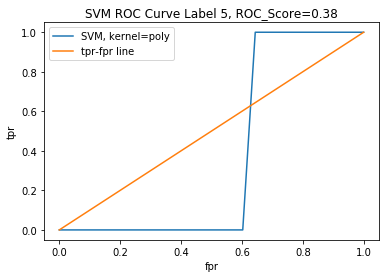

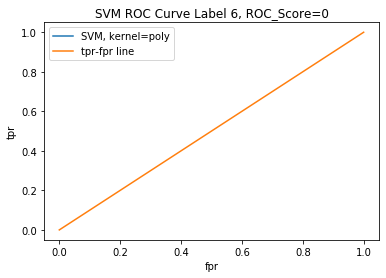

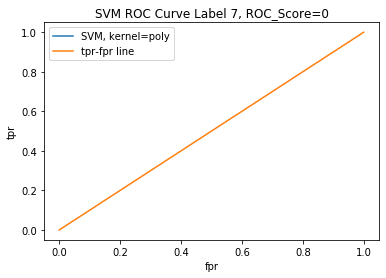

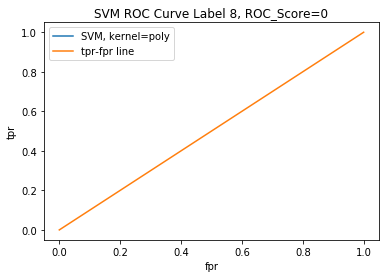

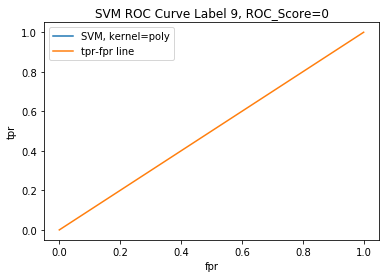

SVM rbf Kernel results
_________________________________________
SVM rbf Kernel Accuracy Score: 0.33783783783783783

SVM rbf Kernel Confusion Matrix

[[ 0  0  7  0  3  0  0  0  4  1]
 [ 0  0  0  0  1  0  0  0  0  1]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  3 11  5  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  1  4  0  4  4  2  0  8  1]
 [ 0  0  0  0  0  0  4  0  2  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1]]


		    SVM rbf Kernel Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         2
           3       0.22      1.00      0.36         4
           4       1.00      0.58      0.73        19
           5       0.07      1.00      0.13         1
           6       1.00      0.17      0.29        24
           8       0.67      0.67      0.67         6
           9       0.00      0.00      0

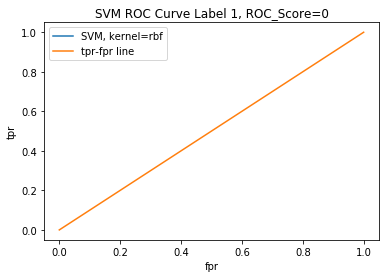

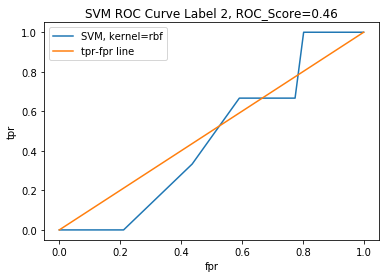

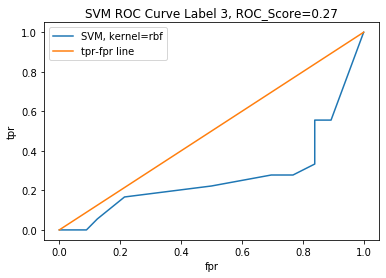

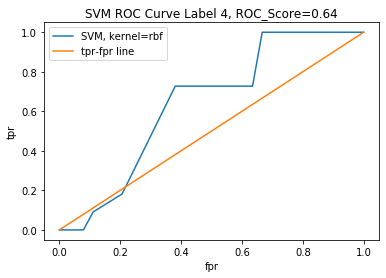

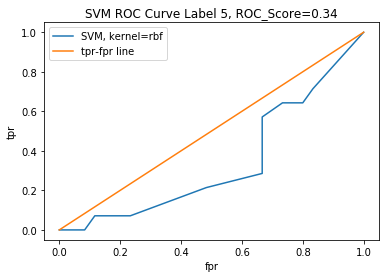

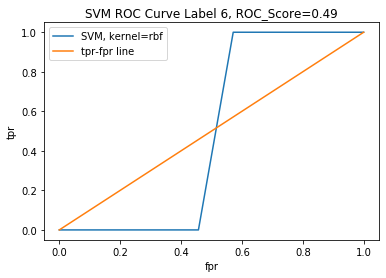

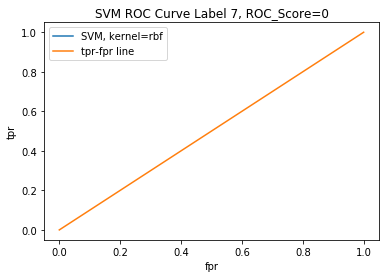

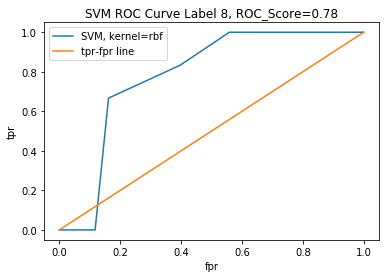

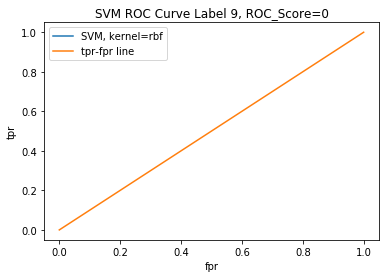

SVM sigmoid Kernel results
_________________________________________
SVM sigmoid Kernel Accuracy Score: 0.527027027027027

SVM sigmoid Kernel Confusion Matrix

[[ 6  0  1  0  3  0  0  1  0  3  1]
 [ 0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  3 10  5  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  2  1  1  1 12  2  0  0  4  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  2  0]
 [ 0  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


		    SVM sigmoid Kernel Classification Report

              precision    recall  f1-score   support

           1       1.00      0.40      0.57        15
           2       0.33      0.50      0.40         2
           3       0.38      0.75      0.50         4
           4       0.91      0.53      0.67        19
           5       0.10      1.00      0.18         1
           6       0.92      0.50      0.65        24
           7  

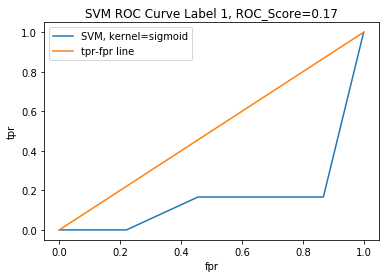

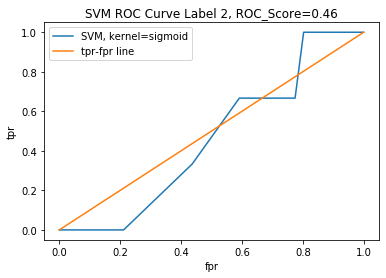

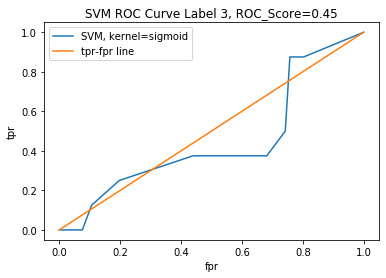

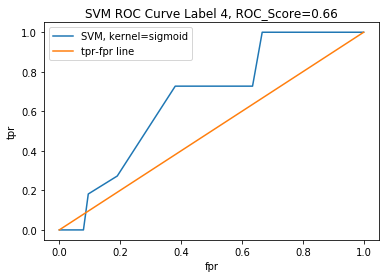

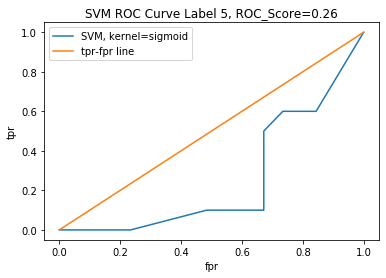

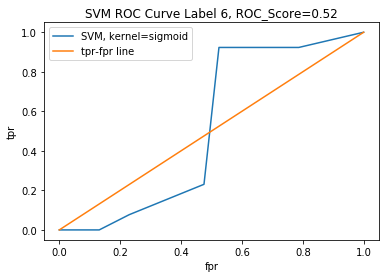

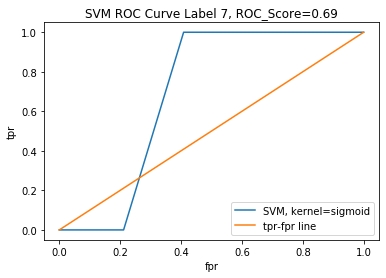

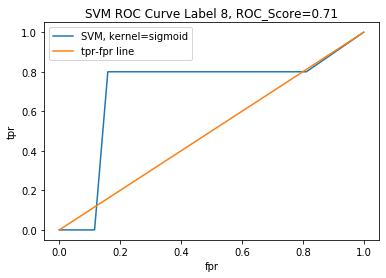

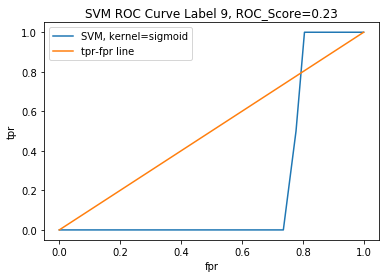

In [1239]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, 9, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

# Dataset 3

In [1240]:
X_train3.shape

(6300, 13)

In [1241]:
X_train3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,1.000000e+99
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.000000e+00
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.000000e+00
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00


In [1242]:
n = X_train3.iloc[0][12]

for i in X_train3.keys():
    X_train3[i] = X_train3[i].replace(n, np.nan)

In [1243]:
X_train3 = fast_knn(X_train3.values, k=50)

In [1244]:
X_train3 = pd.DataFrame(X_train3)

In [1245]:
y_train3.head()

,0
0,9
1,9
2,9
3,1
4,1


In [1246]:
X_test3.shape

(2693, 13)

In [1247]:
X_test3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,5,3,4,1,5,1,3,0,1,1,7,1
1,2,1,4,3,5,5,3,2,0,1,1,7,1
2,1,5,2,3,9,2,1,4,1,3,1,7,1
3,1,2,2,2,3,2,1,4,2,3,3,7,1
4,2,5,3,4,1,2,1,1,0,2,2,7,1


In [1248]:
y_train3.head()

,0
0,9
1,9
2,9
3,1
4,1


In [1249]:
y_train3.tail()

,0
6295,7
6296,9
6297,5
6298,9
6299,8


In [1250]:
def calculateMulticlassROCAUC(X_train, y_train, X_test, y_test, **kwargs):
    for k,v in kwargs.items():
        model = kwargs['model']
        tuner = kwargs['tuner']
        tuner_val = kwargs['tuner_val']
        dec = kwargs['dec']
        label_len = kwargs['label_len']
        
    labels = np.arange(1, label_len+1)
    y_bin = label_binarize(y_test, classes=labels)

    clf = OneVsRestClassifier(LinearSVC(multi_class='ovr', random_state=0))
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    y_pred = clf.predict(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(label_len):
        fpr[i+1], tpr[i+1], thresholds = roc_curve(y_bin[:, i], y_pred)
        roc_auc[i+1] = auc(fpr[i+1], tpr[i+1])
    
    for i in range(label_len):
        if math.isnan(roc_auc[i+1]):
            score = 0
        else: 
            score = round(roc_auc[i+1],2)
        if (tuner == '') or (tuner_val == None):
            plt.plot(fpr[i+1], tpr[i+1], label=f'{model}')
        else:
            plt.plot(fpr[i+1], tpr[i+1], label=f'{model}, {tuner}={tuner_val}')
        plt.plot([0, 1], [0, 1], label='tpr-fpr line')
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        if dec == True:
            plt.title(f'{model} ROC Curve Label {i+1}, ROC_Score={score}')
            tuner_val -= 1
        else:
            plt.title(f'{model} ROC Curve Label {i+1}, ROC_Score={score}')
        plt.legend()
        plt.show()

## KNN for DS3

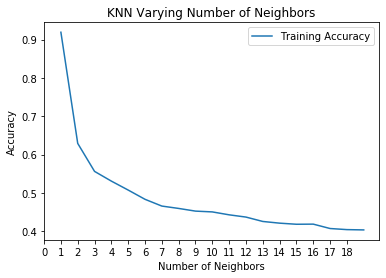

In [1251]:
neighbors, train_accuracy = testK(X_train3, y_train3)
plotTestK(neighbors, train_accuracy)

In [1252]:
# Run KNN to get y_test3 data
y_test3 = getTestLabelsKNN(1, X_train3, y_train3, X_test3)

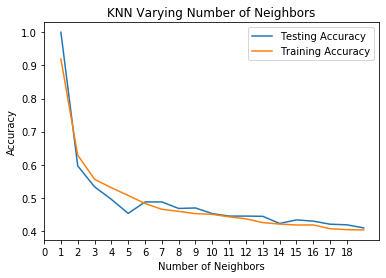

In [1253]:
n, test_acc3, train_acc3 = optimizeK(X_train3, y_train3, X_test3, y_test3)
plotK(n, test_acc3, train_acc3)

In [1254]:
n_neighbors=1
knn_score3, knn_y_pred3 = runKNN(n_neighbors, X_train3, y_train3, X_test3, y_test3)
print(f'Accuracy: {knn_score3}')

Accuracy: 1.0


KNN Accuracy Score, k=1: 1.0

KNN Confusion Matrix, k=1

[[447   0   0   0   0   0   0   0   0]
 [  0 409   0   0   0   0   0   0   0]
 [  0   0 189   0   0   0   0   0   0]
 [  0   0   0 287   0   0   0   0   0]
 [  0   0   0   0 268   0   0   0   0]
 [  0   0   0   0   0 264   0   0   0]
 [  0   0   0   0   0   0 235   0   0]
 [  0   0   0   0   0   0   0 356   0]
 [  0   0   0   0   0   0   0   0 238]]

		  KNN Classification Report, k=1

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       447
           2       1.00      1.00      1.00       409
           3       1.00      1.00      1.00       189
           4       1.00      1.00      1.00       287
           5       1.00      1.00      1.00       268
           6       1.00      1.00      1.00       264
           7       1.00      1.00      1.00       235
           8       1.00      1.00      1.00       356
           9       1.00      1.00      1.00       238

    accuracy

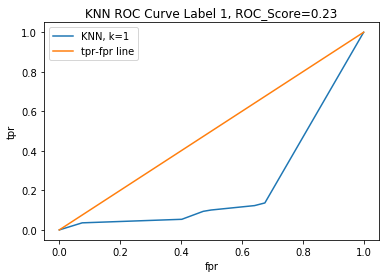

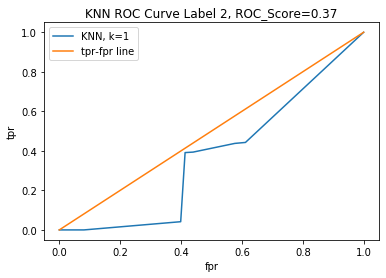

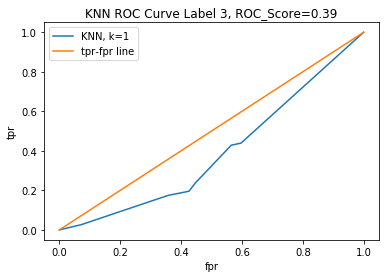

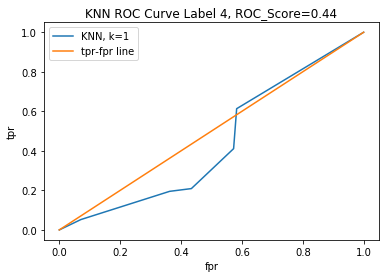

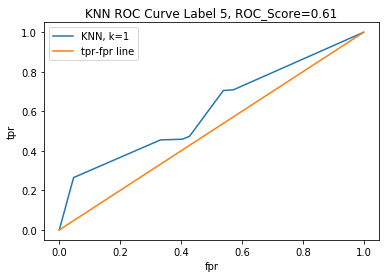

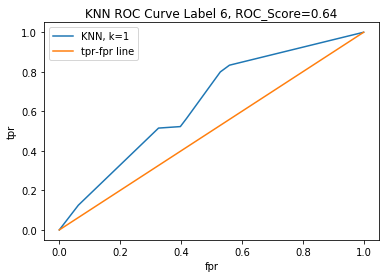

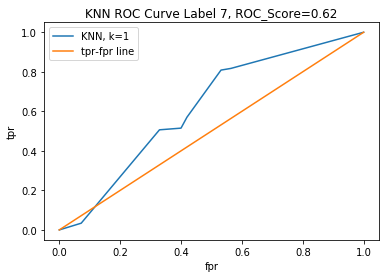

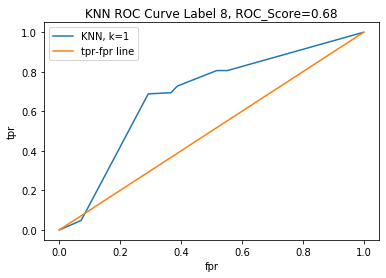

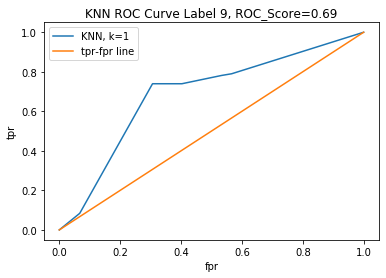

In [1255]:
getScoresKNN(n_neighbors, y_test3, knn_y_pred3)

pd.crosstab(y_test3, knn_y_pred3, rownames=['True'], colnames=['Predicted'], margins=True)

calculateMulticlassROCAUC(X_train3, y_train3, X_test3, y_test3, model='KNN', tuner='k', tuner_val=n_neighbors, label_len=9, dec=False)

## LR for DS3

In [1347]:
def trainFitAccuracyLR(e, X_train, y_train, X_test, y_test):    
    c = np.arange(1, e+1)
    cma = {}
    cra = {}
    acc = {}
    preds = {}
    for i in c:    
        lr = LogisticRegression(C=i, multi_class='ovr', solver='lbfgs',random_state=0)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        cma[i] = confusion_matrix(y_test, y_pred)
        cra[i] = classification_report(y_test, y_pred)
        acc[i] = (accuracy_score(y_test, y_pred))
        preds[i] = y_pred
    return cma, cra, acc, preds

In [1348]:
c = 20
lr_cma3, lr_cr3, lr_acc3, lr_y_pred3 = trainFitAccuracyLR(c, X_train3, y_train3, X_test3, y_test3)

In [1349]:
c = 20
lr_cma3, lr_cr3, lr_acc3, lr_y_pred3 = trainFitAccuracyLR(c, X_train3, y_train3, X_test3, y_test3)
import operator
ky = max(lr_acc3.items(), key=operator.itemgetter(1))[0]
val = float(max(lr_acc3.items(), key=operator.itemgetter(1))[1])

In [1350]:
print(f'Logistic Regression Highest Accuracy Score, C={c3}: {lr_val3}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma3[ky]}\n')
pd.crosstab(y_test3, lr_y_pred3[lr_ky3], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, C=20: 0.16598588934274044

Logistic Regression Most Accurate Confusion Matrix

[[447   0   0   0   0   0   0   0   0]
 [409   0   0   0   0   0   0   0   0]
 [189   0   0   0   0   0   0   0   0]
 [287   0   0   0   0   0   0   0   0]
 [268   0   0   0   0   0   0   0   0]
 [264   0   0   0   0   0   0   0   0]
 [235   0   0   0   0   0   0   0   0]
 [356   0   0   0   0   0   0   0   0]
 [238   0   0   0   0   0   0   0   0]]



Predicted,1,All
True,,
1,447,447
2,409,409
3,189,189
4,287,287
5,268,268
6,264,264
7,235,235
8,356,356
9,238,238



	   Logistic Regression Classification Report C=20

              precision    recall  f1-score   support

           1       0.17      1.00      0.28       447
           2       0.00      0.00      0.00       409
           3       0.00      0.00      0.00       189
           4       0.00      0.00      0.00       287
           5       0.00      0.00      0.00       268
           6       0.00      0.00      0.00       264
           7       0.00      0.00      0.00       235
           8       0.00      0.00      0.00       356
           9       0.00      0.00      0.00       238

    accuracy                           0.17      2693
   macro avg       0.02      0.11      0.03      2693
weighted avg       0.03      0.17      0.05      2693



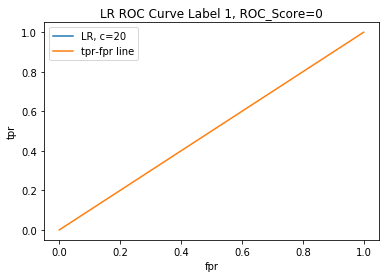

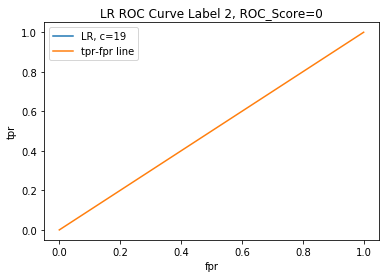

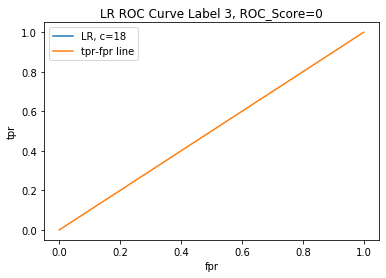

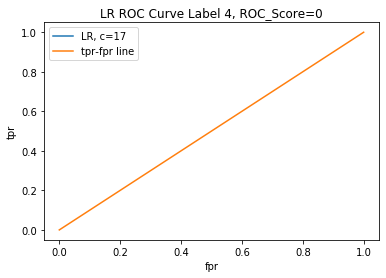

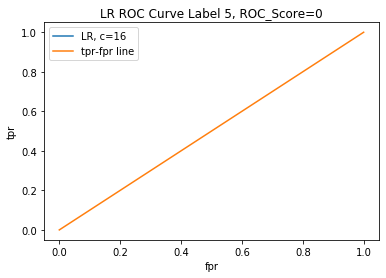

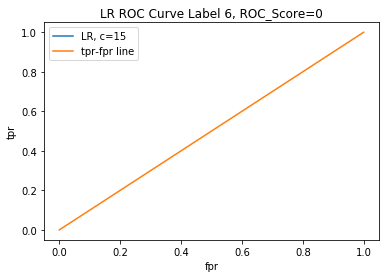

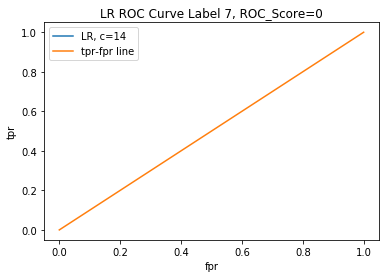

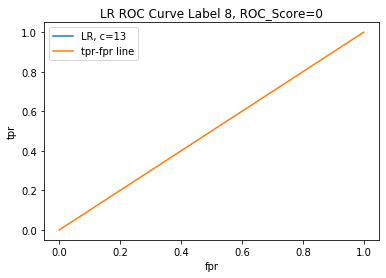

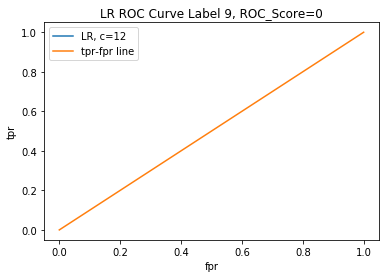

In [1351]:
print(f'\n\t   Logistic Regression Classification Report C={c}\n\n{lr_cr3[lr_ky3]}')
calculateMulticlassROCAUC(X_train3, y_train3, X_test3, lr_y_pred3[lr_ky3], model='LR', tuner='c', tuner_val=c, label_len=9, dec=True)

## Random Forest for DS3

Random Forest Accuracy Score: 0.45265503156331227

Random Forest Confusion Matrix

[[353  17  20  16   5   8  16   7   5]
 [120  87  26  32  18  32  35  38  21]
 [ 35  14  67  12   8  22  14  14   3]
 [ 67  22  13  97  17  23  15  20  13]
 [ 52  21  18  20  70  36  13  29   9]
 [ 32  12   6  15  16 108  33  26  16]
 [ 19   6   7  14  12  35 106  26  10]
 [ 21   2   6  10   4  25  41 209  38]
 [ 38   3   3   0   3  19  13  37 122]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.48      0.79      0.60       447
           2       0.47      0.21      0.29       409
           3       0.40      0.35      0.38       189
           4       0.45      0.34      0.39       287
           5       0.46      0.26      0.33       268
           6       0.35      0.41      0.38       264
           7       0.37      0.45      0.41       235
           8       0.51      0.59      0.55       356
           9       0.51      0.51    

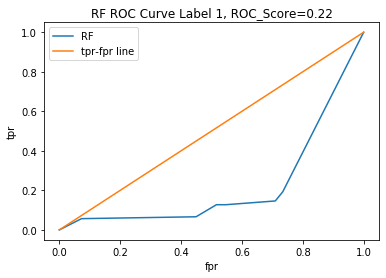

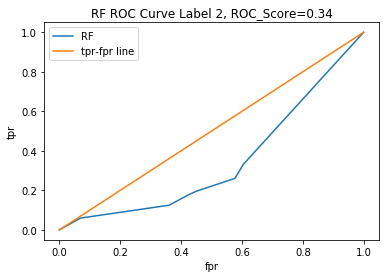

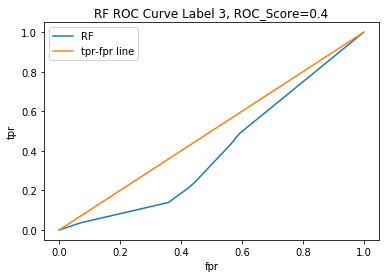

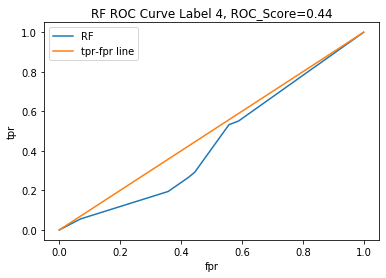

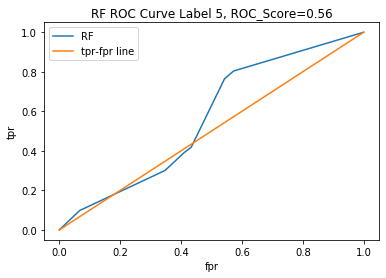

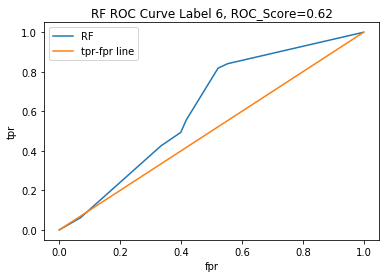

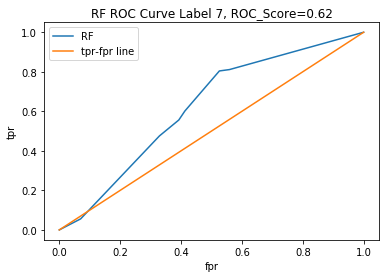

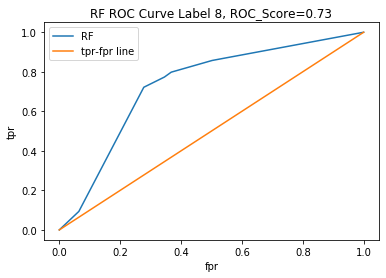

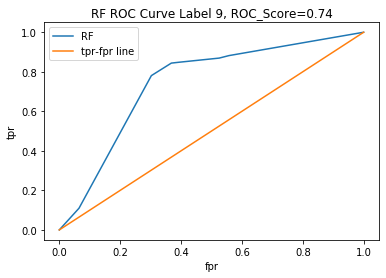

In [1261]:
runRandomForest(X_train3, y_train3, X_test3, y_test3, 9)

In [1331]:
def countUniqueValues(data):
    from collections import Counter
    print(f'Values: {Counter(data).keys()}\nKeys: {Counter(data).values()}')

## SVM for DS3

SVM linear Kernel results
_________________________________________
SVM linear Kernel Accuracy Score: 0.2699591533605644

SVM linear Kernel Confusion Matrix

[[372  12   2   9   0  11  23   9   9]
 [194  17   3   9   0  25 145  16   0]
 [ 76   5   4  32   0  36  12  24   0]
 [141   8   4  34   0  39   9  45   7]
 [ 61   3   0  37   0  45   6  48  68]
 [ 37   5   0  23   0  67  10  95  27]
 [ 37   2   1  16   0  55  14 109   1]
 [ 63   2   1  10   0  45  15 218   2]
 [ 51   0   0   1   0  11  12 162   1]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       0.36      0.83      0.50       447
           2       0.31      0.04      0.07       409
           3       0.27      0.02      0.04       189
           4       0.20      0.12      0.15       287
           5       0.00      0.00      0.00       268
           6       0.20      0.25      0.22       264
           7       0.06      0.06      0.06       235
        

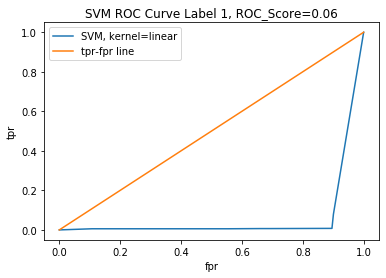

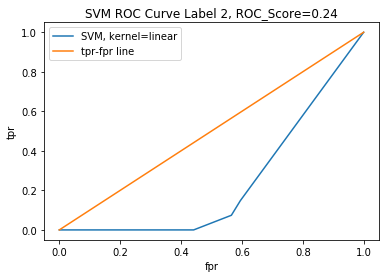

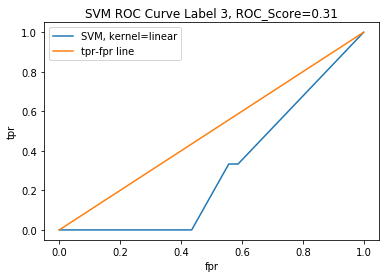

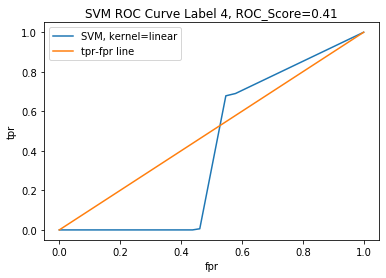

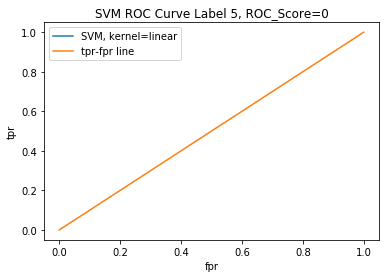

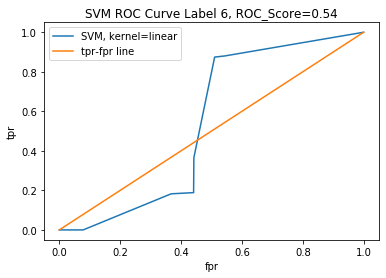

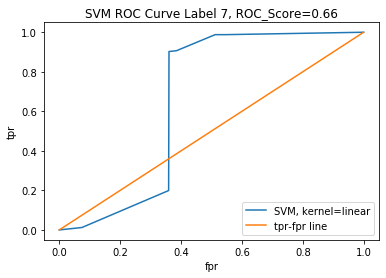

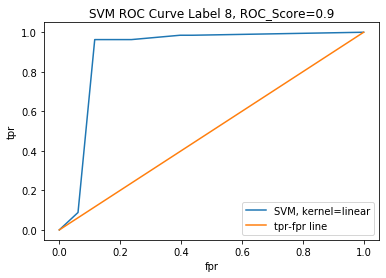

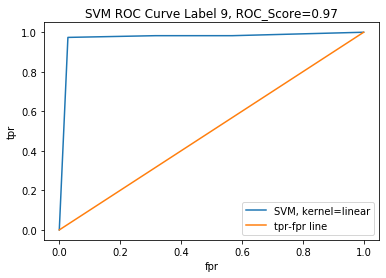

SVM poly Kernel results
_________________________________________
SVM poly Kernel Accuracy Score: 0.311919792053472

SVM poly Kernel Confusion Matrix

[[370  15   5  10   1   7   7   9  23]
 [109  31   8  18   2  26   3   5 207]
 [ 40  20  43  16   4  45   9   9   3]
 [ 74  17   6  38   7  42  20  21  62]
 [ 34  12  71  25  16  71   6  24   9]
 [ 27   9  10  13   4 100  25  45  31]
 [ 24   3   1   9   9  71  24  66  28]
 [ 31   3   2   7   0  64  26 155  68]
 [ 48   2   2   3   0  17   9  94  63]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.49      0.83      0.61       447
           2       0.28      0.08      0.12       409
           3       0.29      0.23      0.26       189
           4       0.27      0.13      0.18       287
           5       0.37      0.06      0.10       268
           6       0.23      0.38      0.28       264
           7       0.19      0.10      0.13       235
           8     

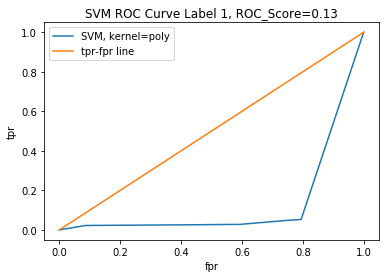

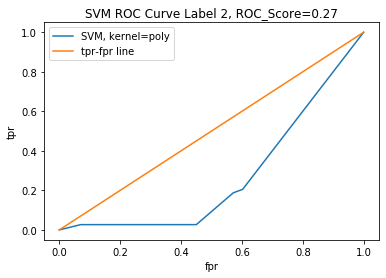

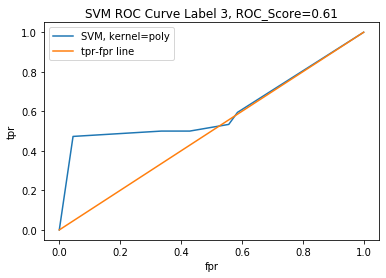

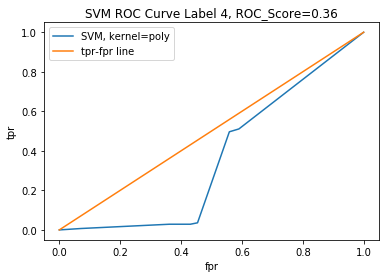

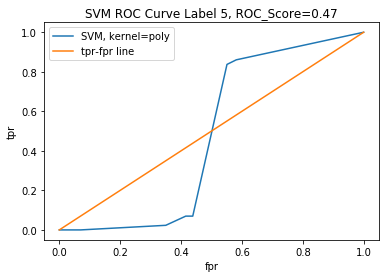

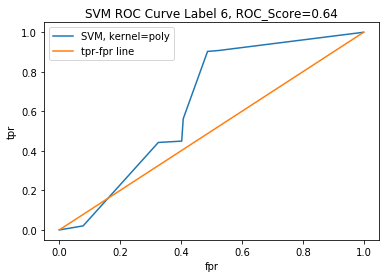

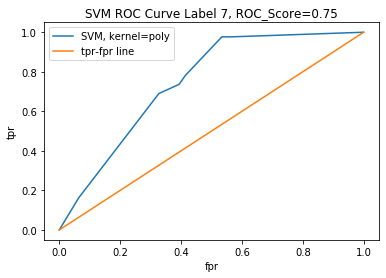

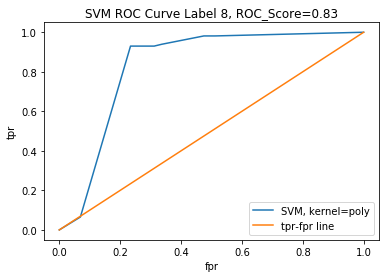

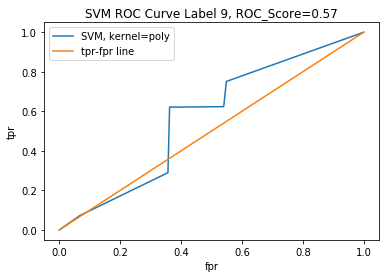

SVM rbf Kernel results
_________________________________________
SVM rbf Kernel Accuracy Score: 0.3044931303379131

SVM rbf Kernel Confusion Matrix

[[400  19   2  12   0   6   5   3   0]
 [324  32   3  14   1  25   3   7   0]
 [ 74  17   6  23   1  45   6  17   0]
 [144  21   1  43   0  43  10  25   0]
 [125   5   0  28   1  83   4  21   1]
 [ 67  12   1   9   0  95  13  60   7]
 [ 40   6   0   9   1  72  13  85   9]
 [ 65   5   0   8   0  55  22 170  31]
 [ 53   2   1   1   0  11   4 106  60]]


		    SVM rbf Kernel Classification Report

              precision    recall  f1-score   support

           1       0.31      0.89      0.46       447
           2       0.27      0.08      0.12       409
           3       0.43      0.03      0.06       189
           4       0.29      0.15      0.20       287
           5       0.25      0.00      0.01       268
           6       0.22      0.36      0.27       264
           7       0.16      0.06      0.08       235
           8       0

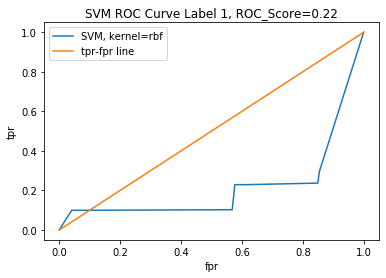

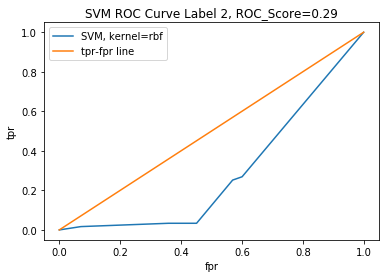

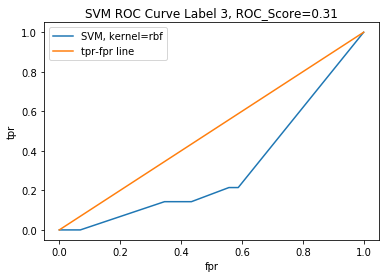

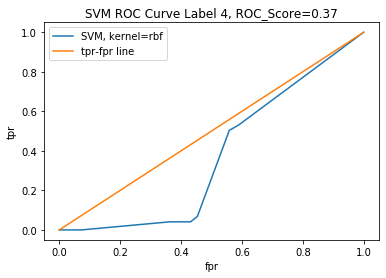

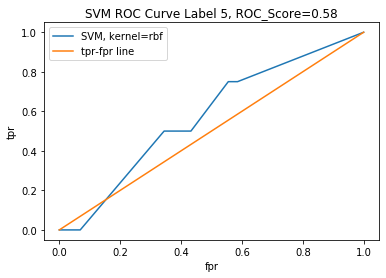

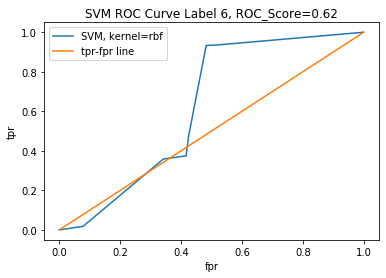

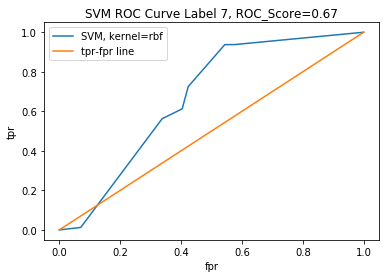

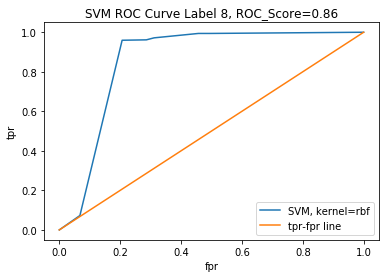

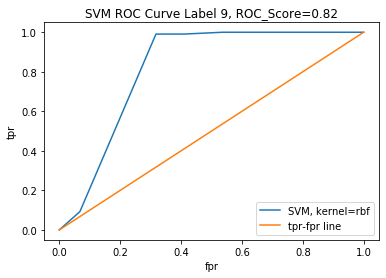

SVM sigmoid Kernel results
_________________________________________
SVM sigmoid Kernel Accuracy Score: 0.2636464909023394

SVM sigmoid Kernel Confusion Matrix

[[279 166   0   0   0   0   0   2   0]
 [ 97 308   0   0   0   0   0   3   1]
 [108  70   1   2   0   0   0   8   0]
 [100 167   0   3   0   1   0  15   1]
 [ 82 156   1   2   0   0   0  26   1]
 [117  88   0   7   0   2   0  46   4]
 [106  67   0   5   0   2   0  50   5]
 [119 104   1   6   0   3   0  99  24]
 [ 47  78   1   8   1   3   0  82  18]]


		    SVM sigmoid Kernel Classification Report

              precision    recall  f1-score   support

           1       0.26      0.62      0.37       447
           2       0.26      0.75      0.38       409
           3       0.25      0.01      0.01       189
           4       0.09      0.01      0.02       287
           5       0.00      0.00      0.00       268
           6       0.18      0.01      0.01       264
           7       0.00      0.00      0.00       235
    

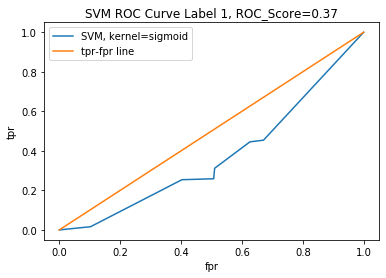

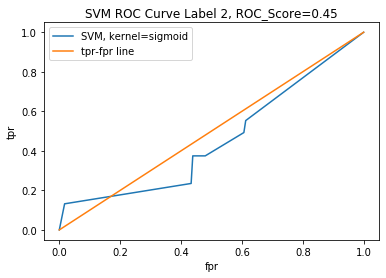

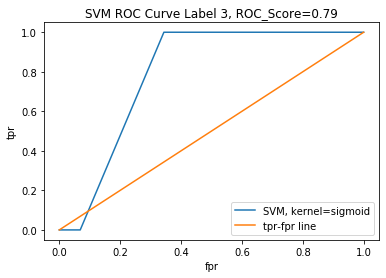

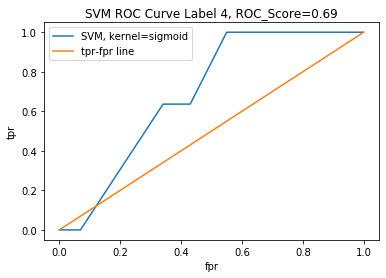

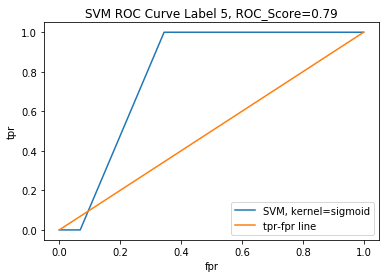

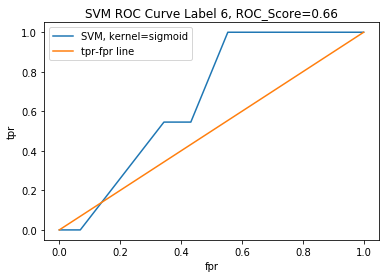

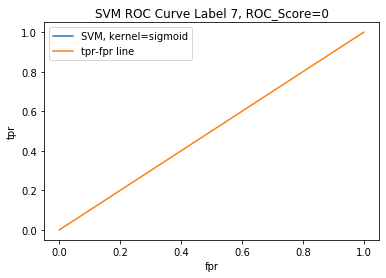

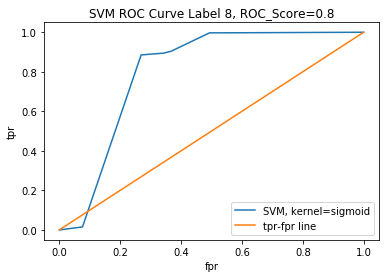

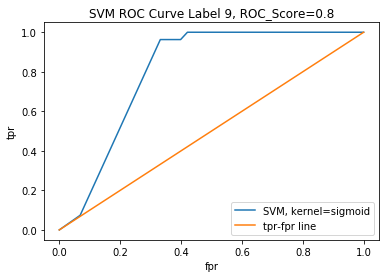

In [1264]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, 9, X_train3, y_train3, X_test3, y_test3)

# Dataset 4

In [1266]:
X_train4.shape

(2547, 112)

In [1267]:
X_train4.head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,-0.44987,-0.20049,-0.48729,-0.061085,-0.051024,-0.021653,0.30788,-0.057097,-0.015610,0.13241,...,4.5912,23.2100,146.23,-178.08,152.01,-129.72,126.48,-147.33,168.65,180.33
1,-0.52843,-0.25912,-0.42584,-0.061339,-0.075853,-0.027442,0.30166,-0.064007,-0.042905,0.33057,...,9.7736,-4.6825,103.02,-182.73,168.97,-151.29,124.89,-118.42,125.41,203.31
2,-0.49823,-0.26346,-0.40683,-0.050683,-0.066742,-0.024397,0.27500,-0.130610,-0.105670,0.28596,...,38.8230,-53.3400,161.33,-180.05,151.52,-127.85,117.96,-125.76,139.76,193.23
3,-0.42405,-0.18392,-0.33761,-0.035511,-0.048362,-0.008383,0.23487,-0.197570,-0.075233,0.13323,...,81.5990,-93.0770,145.09,172.44,-196.78,-135.79,124.88,-134.61,145.45,194.52
4,-0.21487,-0.24508,-0.25204,-0.111790,-0.045751,-0.035225,0.21666,-0.216510,-0.085224,0.33120,...,-178.4200,-149.6900,154.25,-168.03,172.94,161.30,-164.67,179.68,-194.52,192.15


In [1268]:
y_train4.head()

,0
0,1
1,1
2,1
3,1
4,1


In [1270]:
X_test4.shape

(1092, 112)

In [1311]:
X_test4

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,-0.373130,-0.169830,-0.356830,-0.040283,-0.079075,-0.020488,0.271390,-0.14721,-0.081915,0.219970,...,43.948,-106.31,196.34,164.64,-186.40,-130.870,106.28,-118.30,156.43,177.77
1,-0.551510,-0.251460,-0.471950,-0.048137,-0.037200,-0.024774,0.200150,-0.20176,-0.100090,0.270520,...,135.530,-164.96,192.84,172.28,-183.79,-154.350,142.23,-153.71,176.14,175.55
2,-0.360400,-0.192660,-0.254710,-0.026178,-0.027717,-0.033271,0.180330,-0.21878,-0.095353,0.313880,...,201.600,146.38,-172.28,177.15,-183.64,-166.020,165.69,175.47,-167.70,176.16
3,-0.526390,-0.194160,-0.436230,-0.034959,-0.018393,-0.025262,0.172440,-0.22360,-0.088358,0.298530,...,207.540,134.54,-162.56,-182.59,166.18,-160.170,172.59,172.06,-160.75,169.16
4,-0.488490,-0.232580,-0.327950,-0.041850,-0.035176,-0.017894,0.166480,-0.22838,-0.080774,0.264310,...,194.510,143.40,-165.50,-178.71,173.22,-169.210,166.05,177.91,-163.38,-188.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,-0.042106,-0.060041,-0.052885,-0.066470,-0.046249,-0.080368,0.039437,-0.37812,-0.309870,0.070089,...,171.260,-177.65,175.35,141.95,-145.25,195.870,-220.17,203.51,-185.19,190.42
1088,-0.075579,-0.057300,-0.054729,-0.098470,-0.094048,-0.067433,0.001865,-0.38659,-0.290770,0.085219,...,175.340,-195.36,180.89,158.21,-215.23,-84.344,105.40,205.39,-191.70,195.67
1089,-0.046965,-0.070540,-0.058407,-0.105140,-0.128010,-0.080368,0.009211,-0.38623,-0.301200,0.101070,...,189.890,-205.38,186.58,172.02,-139.57,105.950,-142.26,143.56,-125.91,178.52
1090,-0.053778,-0.025624,-0.049878,-0.093137,-0.107260,-0.051512,0.025017,-0.39009,-0.294060,0.078960,...,183.000,-176.71,184.49,145.63,-141.06,211.050,-204.05,184.96,-204.15,188.35


In [1273]:
X_test4.tail()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
1087,-0.042106,-0.060041,-0.052885,-0.066470,-0.046249,-0.080368,0.039437,-0.37812,-0.30987,0.070089,...,171.26,-177.65,175.35,141.95,-145.25,195.870,-220.17,203.51,-185.19,190.42
1088,-0.075579,-0.057300,-0.054729,-0.098470,-0.094048,-0.067433,0.001865,-0.38659,-0.29077,0.085219,...,175.34,-195.36,180.89,158.21,-215.23,-84.344,105.40,205.39,-191.70,195.67
1089,-0.046965,-0.070540,-0.058407,-0.105140,-0.128010,-0.080368,0.009211,-0.38623,-0.30120,0.101070,...,189.89,-205.38,186.58,172.02,-139.57,105.950,-142.26,143.56,-125.91,178.52
1090,-0.053778,-0.025624,-0.049878,-0.093137,-0.107260,-0.051512,0.025017,-0.39009,-0.29406,0.078960,...,183.00,-176.71,184.49,145.63,-141.06,211.050,-204.05,184.96,-204.15,188.35
1091,-0.086850,-0.088063,-0.104710,-0.145800,-0.158830,-0.080368,0.036635,-0.39016,-0.32705,0.089560,...,198.30,-221.31,188.51,184.50,-221.56,197.830,-179.47,167.73,-140.18,172.17


In [1314]:
X_train4_cmp, X_test4_cmp = trainPCA(X_train4, X_test4)

X_train Variance: 1.0000000000000002
X_train Shape: (2547, 112)
X_train Variance: 1.0000000000000002
X_train Shape: (1092, 112)


In [1318]:
X_train4_cmp.shape

(2547, 112)

In [1319]:
X_test4_cmp.shape

(1092, 112)

## KNN for DS4

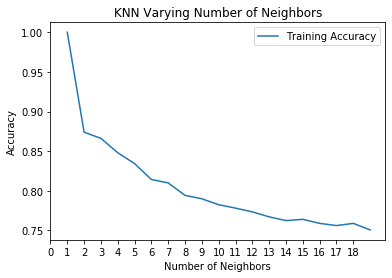

In [1327]:
neighbors, train_accuracy = testK(X_train4_cmp, y_train4)
plotTestK(neighbors, train_accuracy)

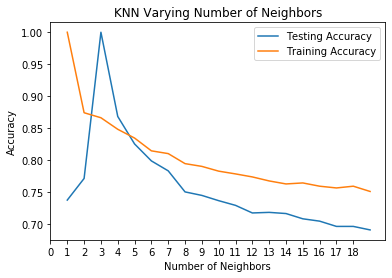

In [1329]:
y_test4 = getTestLabelsKNN(3, X_train4_cmp, y_train4, X_test4_cmp)
n4, test_acc4, train_acc4 = optimizeK(X_train4_cmp, y_train4, X_test4_cmp, y_test4)
plotK(n, test_acc4, train_acc4)

In [1332]:
countUniqueValues(y_test3)

Values: dict_keys([9, 8, 1, 6, 4, 2, 7, 3, 5])
Keys: dict_values([238, 356, 447, 264, 287, 409, 235, 189, 268])


In [1333]:
knn_score4, knn_y_pred4 = runKNN(5, X_train4_cmp, y_train4, X_test4_cmp, y_test4)
print(f'Accuracy: {knn_score4}')

Accuracy: 0.825091575091575


KNN Accuracy Score, k=5: 0.825091575091575

KNN Confusion Matrix, k=5

[[ 64  12  10   6   2   2   1   4   2]
 [  4 136   9   2   1   1   2   3   1]
 [  1   9  93   2   4   1   0   0   2]
 [  5   3   0  93   9   0   0   0   0]
 [  0   1   7   2 144  19   2   1   2]
 [  0   0   0   2   4 121   2   2   2]
 [  0   0   0   0   2   6  58  12   3]
 [  0   2   0   0   1   0   4 128   0]
 [  0   2   0   1   2   3   6   3  64]]

		  KNN Classification Report, k=5

              precision    recall  f1-score   support

           1       0.86      0.62      0.72       103
           2       0.82      0.86      0.84       159
           3       0.78      0.83      0.81       112
           4       0.86      0.85      0.85       110
           5       0.85      0.81      0.83       178
           6       0.79      0.91      0.85       133
           7       0.77      0.72      0.74        81
           8       0.84      0.95      0.89       135
           9       0.84      0.79      0.82        81

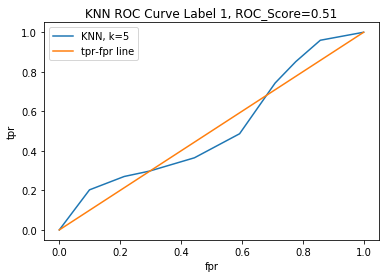

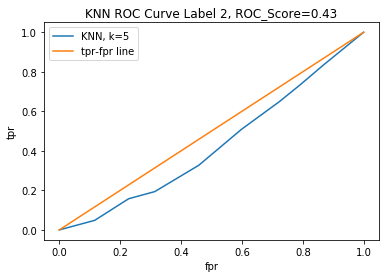

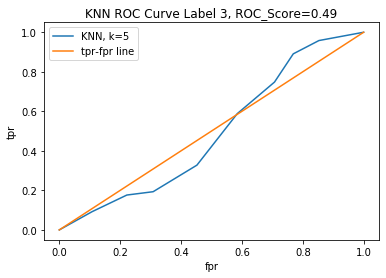

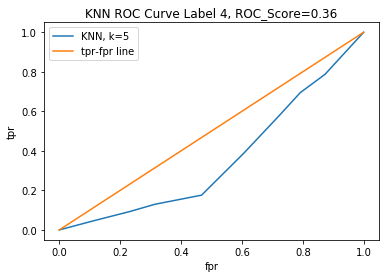

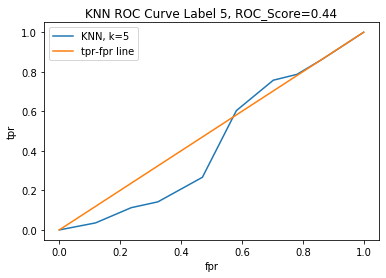

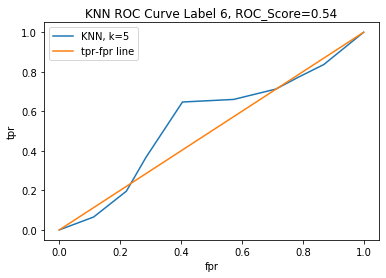

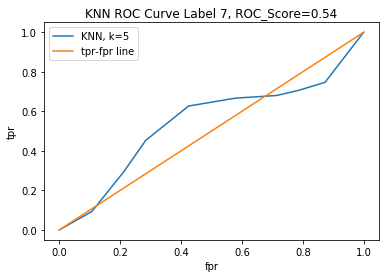

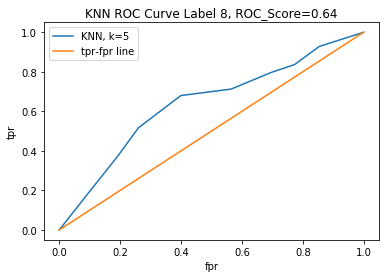

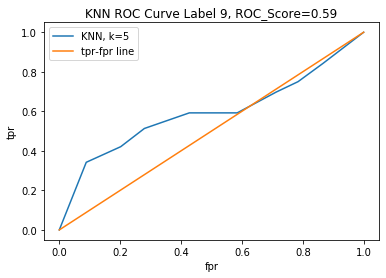

In [1334]:
n_neighbors=5
getScoresKNN(n_neighbors, y_test4, knn_y_pred4)
pd.crosstab(y_test4, knn_y_pred4, rownames=['True'], colnames=['Predicted'], margins=True)
calculateMulticlassROCAUC(X_train4_cmp, y_train4, X_test4_cmp, knn_y_pred4, model='KNN', tuner='k',\
                          tuner_val=n_neighbors, label_len=9, dec=False)

## LR for DS4

In [1356]:
c4 = 20
lr_cma4, lr_cr4, lr_acc4, lr_y_pred4 = trainFitAccuracyLR(c4, X_train4, y_train4, X_test4, y_test4)

In [1357]:
import operator
ky4 = max(lr_acc4.items(), key=operator.itemgetter(1))[0]
val4 = float(max(lr_acc4.items(), key=operator.itemgetter(1))[1])

In [1358]:
print(f'Logistic Regression Highest Accuracy Score, C={c4}: {val4}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma4[ky4]}\n')
pd.crosstab(y_test4, lr_y_pred4[ky4], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, C=20: 0.3489010989010989

Logistic Regression Most Accurate Confusion Matrix

[[24 19 16 13  7  2  4  9  9]
 [25 50 27 21  7 10  4  8  7]
 [15  9 59  6  4  8  2  3  6]
 [18 15 13 32  6 10  6  5  5]
 [11  5 20 36 37 26 16 16 11]
 [ 1  5  9  2 20 48 31  5 12]
 [ 3  1  2  3  7  3 36 12 14]
 [ 5 10  2  1  3  9 21 58 26]
 [ 5  3  6  3  4  8  2 13 37]]



Predicted,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,
1,24,19,16,13,7,2,4,9,9,103
2,25,50,27,21,7,10,4,8,7,159
3,15,9,59,6,4,8,2,3,6,112
4,18,15,13,32,6,10,6,5,5,110
5,11,5,20,36,37,26,16,16,11,178
6,1,5,9,2,20,48,31,5,12,133
7,3,1,2,3,7,3,36,12,14,81
8,5,10,2,1,3,9,21,58,26,135
9,5,3,6,3,4,8,2,13,37,81



	   Logistic Regression Classification Report C=20

              precision    recall  f1-score   support

           1       0.22      0.23      0.23       103
           2       0.43      0.31      0.36       159
           3       0.38      0.53      0.44       112
           4       0.27      0.29      0.28       110
           5       0.39      0.21      0.27       178
           6       0.39      0.36      0.37       133
           7       0.30      0.44      0.35        81
           8       0.45      0.43      0.44       135
           9       0.29      0.46      0.36        81

    accuracy                           0.35      1092
   macro avg       0.35      0.36      0.35      1092
weighted avg       0.36      0.35      0.34      1092



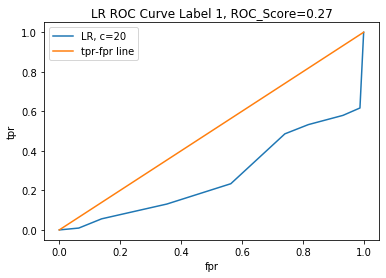

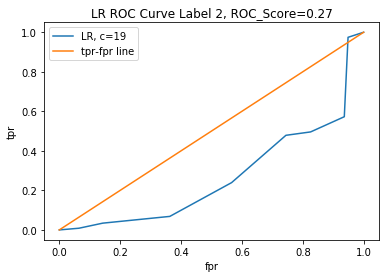

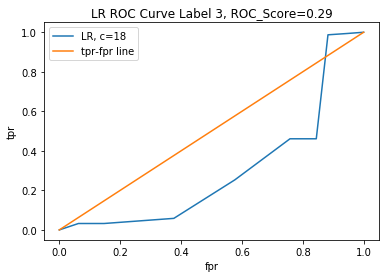

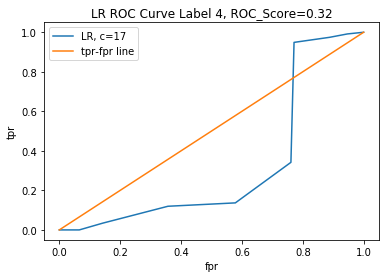

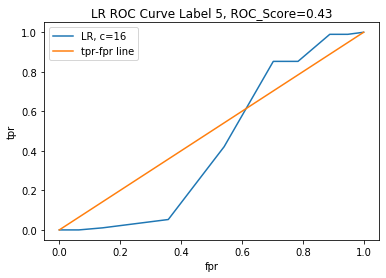

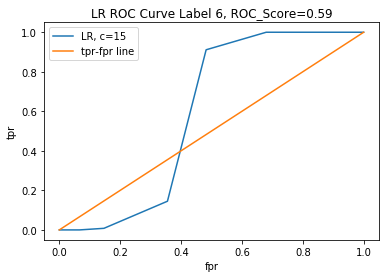

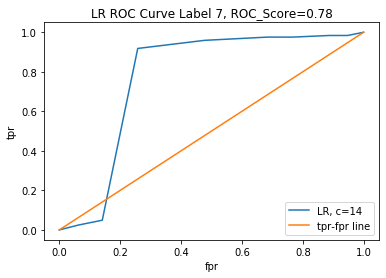

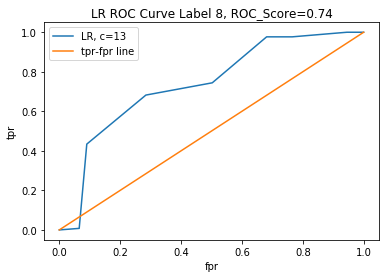

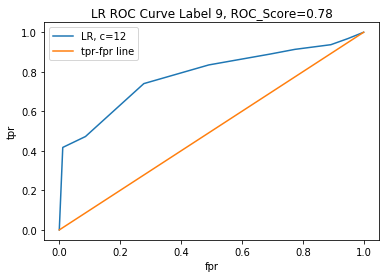

In [1359]:
print(f'\n\t   Logistic Regression Classification Report C={c4}\n\n{lr_cr4[ky4]}')
calculateMulticlassROCAUC(X_train4, y_train4, X_test4, lr_y_pred4[ky4], model='LR', tuner='c', tuner_val=c, label_len=9, dec=True)

## Random Forest for DS4

Random Forest Accuracy Score: 0.4001831501831502

Random Forest Confusion Matrix

[[28 15 19 15  7  2  5  5  7]
 [30 59 18 17  7 11  6  4  7]
 [14 10 65  8  7  2  1  0  5]
 [18 18 14 35 12  4  3  1  5]
 [13  5  7 36 51 31 13  9 13]
 [ 4  2  3  2 19 54 28  3 18]
 [ 2  1  0  2  5  6 38 11 16]
 [ 7  7  5  1  0  5 19 68 23]
 [ 5  8  3  3  5  5  3 10 39]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.23      0.27      0.25       103
           2       0.47      0.37      0.42       159
           3       0.49      0.58      0.53       112
           4       0.29      0.32      0.31       110
           5       0.45      0.29      0.35       178
           6       0.45      0.41      0.43       133
           7       0.33      0.47      0.39        81
           8       0.61      0.50      0.55       135
           9       0.29      0.48      0.36        81

    accuracy                           0.40      1092
   macro a

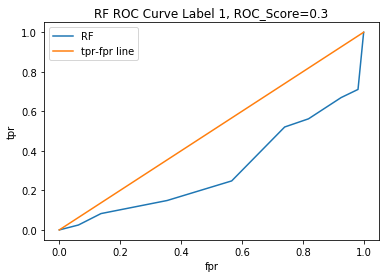

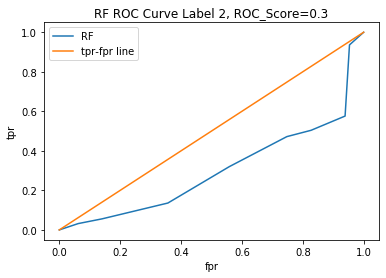

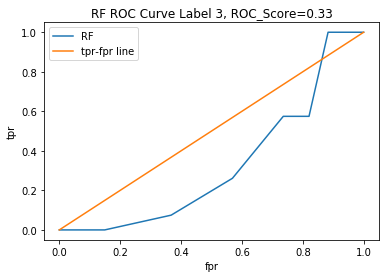

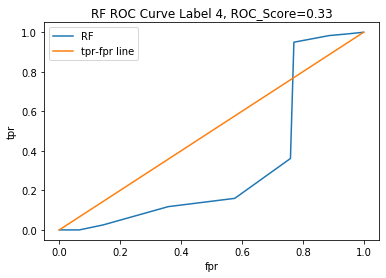

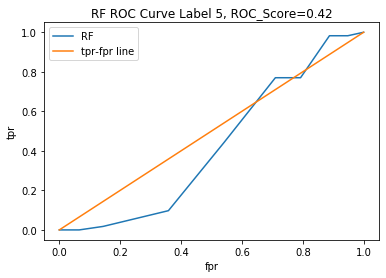

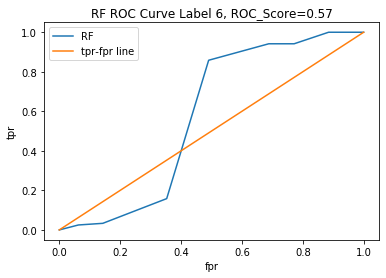

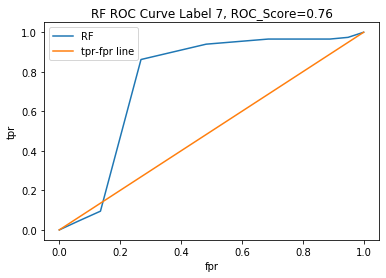

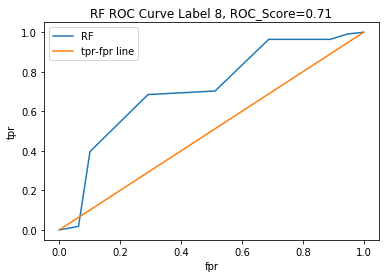

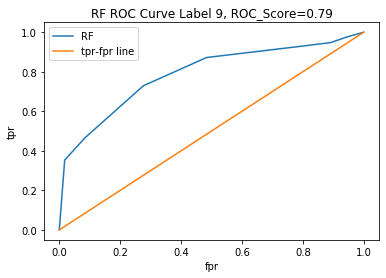

In [1360]:
runRandomForest(X_train4, y_train4, X_test4, y_test4, 9)

## SVM for DS4

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, 9, X_train4, y_train4, X_test4, y_test4)

SVM linear Kernel results
_________________________________________


In [ ]:
import gc
gc.collect()